In [1]:
## Importing Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
import numpy as np

In [3]:
## Analyzing the data

In [4]:
df = pd.read_csv('insurance2.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [5]:
## Finding and analyzing missing values if any

In [6]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

<AxesSubplot:ylabel='insuranceclaim'>

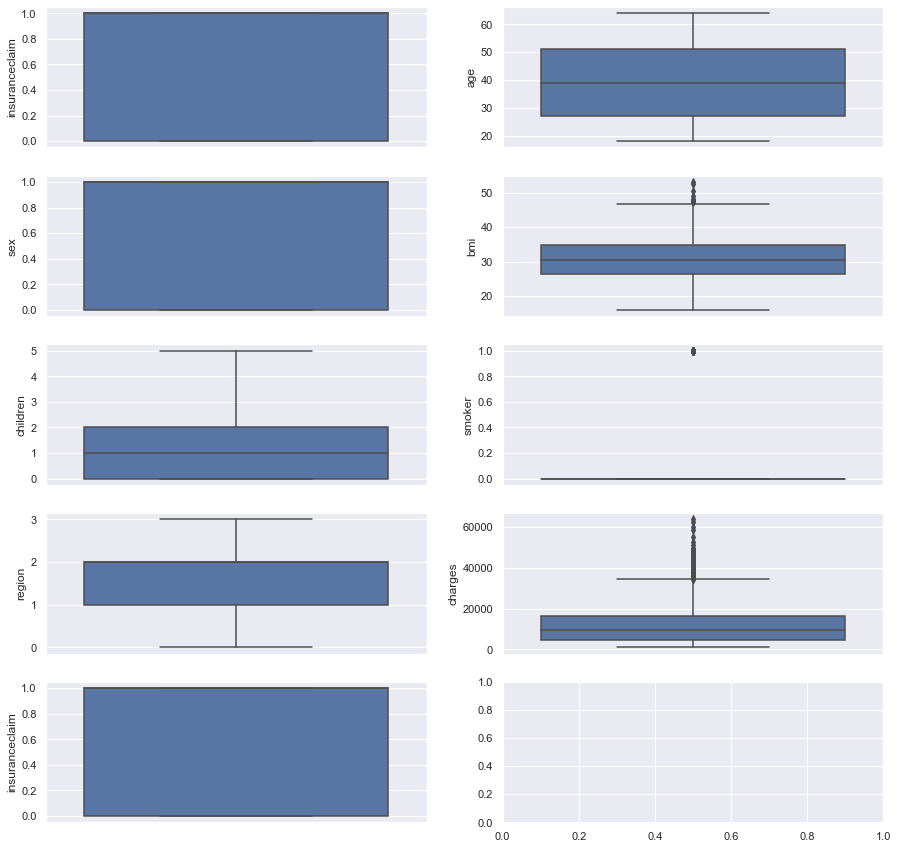

In [7]:
%matplotlib inline
sns.set(font_scale =1.0)
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(15, 15)
sns.boxplot(data = df,y= 'insuranceclaim',ax=axes[0][0])
sns.boxplot(data = df,y= 'age',ax=axes[0][1])
sns.boxplot(data = df,y= 'sex',ax=axes[1][0])
sns.boxplot(data = df,y= 'bmi',ax=axes[1][1])
sns.boxplot(data = df,y= 'children',ax=axes[2][0])
sns.boxplot(data = df,y= 'smoker',ax=axes[2][1])
sns.boxplot(data = df,y= 'region',ax=axes[3][0])
sns.boxplot(data = df,y= 'charges',ax=axes[3][1])
sns.boxplot(data = df,y= 'insuranceclaim',ax=axes[4][0])

In [8]:
## Removing outliers

In [9]:
print("Samples in train set with outliers: {}".format(len(df)))
q1 = df.bmi.quantile(0.25)
q3 = df.bmi.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
train = df.loc[(df.bmi >= lower_bound) & (df.bmi <= upper_bound)]

Samples in train set with outliers: 1338


In [10]:
nq1 = train.charges.quantile(0.25)
nq3 = train.charges.quantile(0.75)
niqr = nq3-nq1
nlower_bound = nq1 - 1.5* niqr
nupper_bound = nq3 + 1.5 * niqr
train = train.loc[(train.charges >= nlower_bound) & (train.charges <= nupper_bound)]
print("Samples in train set without outliers: {}".format(len(train)))

Samples in train set without outliers: 1191


In [11]:
train.shape

(1191, 8)

In [12]:
## visualizing correlation matrix

                     age       sex       bmi  children    smoker    region  \
age             1.000000 -0.021440  0.123827  0.038179 -0.062095  0.006331   
sex            -0.021440  1.000000  0.016487  0.015564  0.014027 -0.007363   
bmi             0.123827  0.016487  1.000000  0.007546 -0.260657  0.152346   
children        0.038179  0.015564  0.007546  1.000000 -0.001901  0.024153   
smoker         -0.062095  0.014027 -0.260657 -0.001901  1.000000 -0.052118   
region          0.006331 -0.007363  0.152346  0.024153 -0.052118  1.000000   
charges         0.448798 -0.022893 -0.064483  0.089083  0.596213 -0.096537   
insuranceclaim  0.120077 -0.002427  0.337762 -0.451144  0.201351  0.008489   

                 charges  insuranceclaim  
age             0.448798        0.120077  
sex            -0.022893       -0.002427  
bmi            -0.064483        0.337762  
children        0.089083       -0.451144  
smoker          0.596213        0.201351  
region         -0.096537        0.00848

<AxesSubplot:>

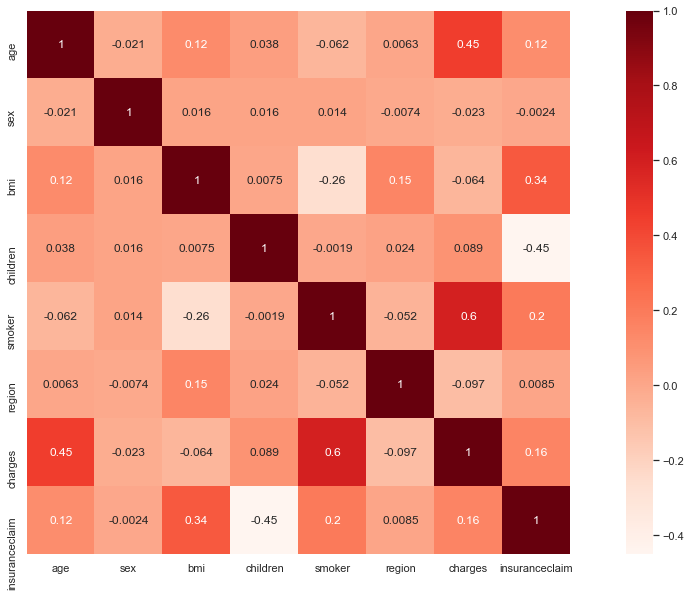

In [13]:
correlation = train.corr()
print(correlation)
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sns.set(font_scale=1)
sns.heatmap(correlation,annot=True,square=True,cmap='Reds')

In [25]:
## using Normalization

In [14]:
means = np.mean(train,axis=0)
std = np.std(train,axis = 0)

In [15]:
train_set = train.drop('insuranceclaim',axis=1)
test_set = train.insuranceclaim
train_set = (train_set - means)/std

In [20]:
train_set.drop('insuranceclaim',axis=1,inplace=True)

In [21]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(train_set,test_set,test_size=0.3)

In [22]:
lr = LogisticRegression()
lr.fit(Xtrain,Ytrain)

LogisticRegression()

In [23]:
## Now checking accuracy

In [24]:
accuracy = lr.score(Xtest,Ytest)
print('accuracy of model is ', accuracy *100,'%')

accuracy of model is  90.5027932960894 %


In [26]:
predictons = lr.predict(Xtrain)

In [34]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(Ytrain,predictons)

In [35]:
cf

array([[326,  59],
       [ 49, 399]], dtype=int64)

<AxesSubplot:>

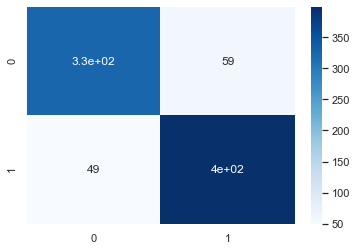

In [36]:
sns.heatmap(cf,annot=True,cmap='Blues')